# Шаг 1. Откроем файл с данными и изучим общую информацию #

In [1]:
!pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import kaleido

In [3]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as mth
import plotly.express as px
from plotly import graph_objects as go

In [9]:
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
try:
    logs = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')
except:
    logs = pd.read_csv('D:/yp/projects/logs_exp.csv', sep = '\t')

In [12]:
display(logs.head())

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [13]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [14]:
logs.shape

(244126, 4)

In [15]:
logs.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


# Шаг 2. Подготовка данных #

**Приведем название столбцов к удобному виду**

In [16]:
logs.columns = ['event_name', 'user_id', 'dt', 'exp_id']

In [17]:
logs

,event_name,user_id,dt,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


**Проверим на дубликаты**

In [18]:
logs.duplicated().sum()

413

Найдено 413 явных дубликатов

In [19]:
display(logs.value_counts())

event_name               user_id              dt          exp_id
PaymentScreenSuccessful  636437379427729086   1564726206  247       5
                         4980045449118619005  1564665640  247       5
Tutorial                 3473691793382022823  1564697509  248       5
                                              1564697513  248       5
                                              1564697648  248       4
                                                                   ..
MainScreenAppear         3042495735033783433  1565017943  248       1
                                              1565030425  248       1
                         3043287401310870279  1564645977  247       1
                                              1564645986  247       1
Tutorial                 9212523802225607780  1564725935  248       1
Length: 243713, dtype: int64

In [20]:
logs = logs.drop_duplicates().reset_index(drop = True)

Удаляем явные дубликаты

**Добавим столбец с датой и датой и временем**

In [21]:
logs['date_time'] = pd.to_datetime(logs['dt'], unit='s')
logs['date'] = pd.to_datetime(logs['date_time']).dt.date

In [22]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   dt          243713 non-null  int64         
 3   exp_id      243713 non-null  int64         
 4   date_time   243713 non-null  datetime64[ns]
 5   date        243713 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [23]:
logs

,event_name,user_id,dt,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


**Проверим датафрейм на пропуски**

In [24]:
logs.isna().sum()

event_name    0
user_id       0
dt            0
exp_id        0
date_time     0
date          0
dtype: int64

**Вывод:**

Переименовали столбцы. Удалили явные дубликаты. Добавили стобцы с датой и датой и временем. Пропусков в данных не обнаружено. Размер датасета 243713 строк × 6 столбцов

# Шаг 3. Изучаем и проверяем данные #

**3.1 Посчитаем количество событий в логе**

In [25]:
logs['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

In [26]:
logs['event_name'].count()

243713

**3.2 Посчитаем количество пользователей в логе**

In [27]:
logs['user_id'].nunique()

7551

**3.3 Сколько в среднем событий приходится на пользователя?**

In [28]:
print(logs['event_name'].count()/logs['user_id'].nunique())

32.27559263673685


**3.4**

**Найдем максимальную и минимальную дату.**

In [29]:
logs.agg({'date':['max','min']})

,date
max,2019-08-07
min,2019-07-25


In [30]:
logs.agg({'date_time':['max','min']})

,date_time
max,2019-08-07 21:15:17
min,2019-07-25 04:43:36


Максимальная дата: 2019-08-07 21:15:17 <br>
Минимальная дата: 2019-07-25 04:43:36

In [31]:
logs['date'].max() - logs['date'].min()

datetime.timedelta(days=13)

In [32]:
logs['date_time'].max() - logs['date_time'].min()

Timedelta('13 days 16:31:41')

**Построим гистограмму по дате и времени**

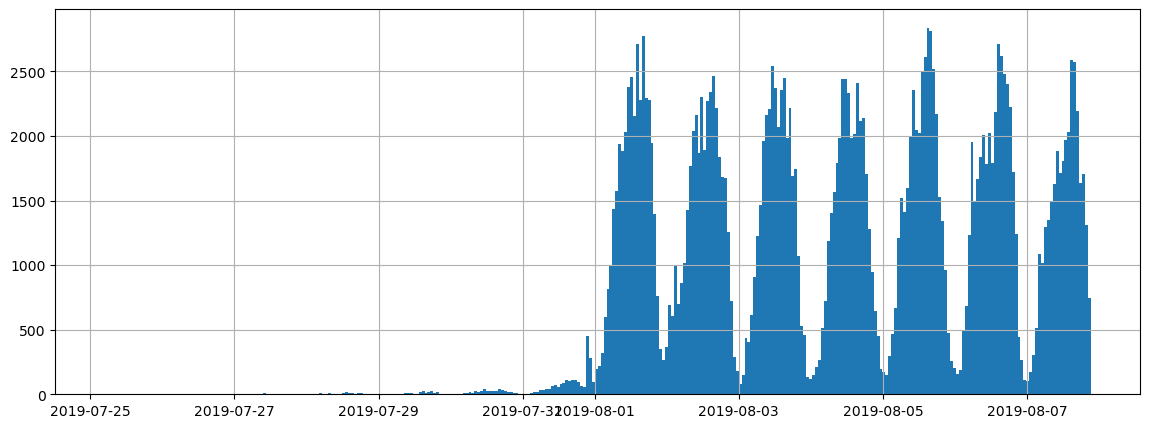

In [33]:
logs['date_time'].hist(bins=14*24, figsize=(14, 5));

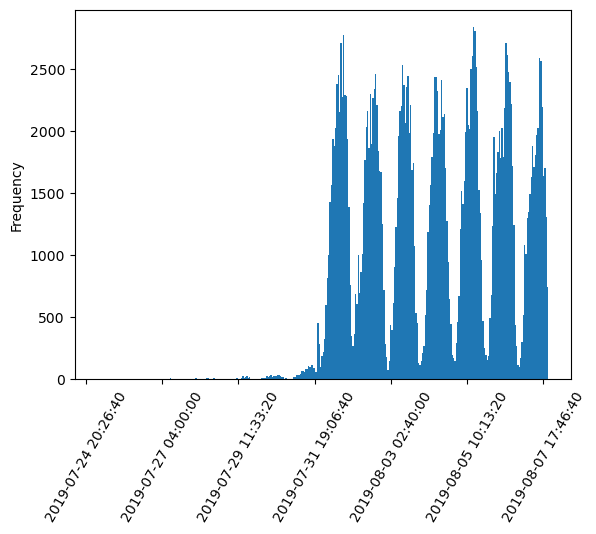

<Figure size 1000x800 with 0 Axes>

In [34]:

fig, ax = plt.subplots()
plt.figure(figsize = (10, 8))
logs['date_time'].astype(np.int64).plot.hist(ax=ax, bins = 14*24)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=60)
plt.show();

Оставляем данные, начиная с 2019-07-31 20:00, потому что до этого времени присутствуют 'доезды', которые могут 'перекосить данные'

**Посчитаем потерю данных и пользователей**

In [35]:
good_logs = logs[logs['date_time'] >= '2019-07-31 20:00']

In [36]:
good_logs

,event_name,user_id,dt,exp_id,date_time,date
1933,MainScreenAppear,2386905776711210873,1564603203,246,2019-07-31 20:00:03,2019-07-31
1934,OffersScreenAppear,2659616611828697302,1564603243,248,2019-07-31 20:00:43,2019-07-31
1935,OffersScreenAppear,5638333191822379090,1564603246,248,2019-07-31 20:00:46,2019-07-31
1936,MainScreenAppear,2419517597868248322,1564603362,247,2019-07-31 20:02:42,2019-07-31
1937,MainScreenAppear,4649999248492122991,1564603501,248,2019-07-31 20:05:01,2019-07-31
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [37]:
(1-(good_logs.shape[0]/logs.shape[0]))*100

0.7931460365265708

Потеря данных - 0.82%

In [38]:
(1-(good_logs.user_id.nunique()/logs.user_id.nunique()))*100

0.17216262746656552

Потеря пользователей - 0.17%

In [39]:
logs.shape[0] - good_logs.shape[0]

1933

In [40]:
logs.user_id.nunique() - good_logs.user_id.nunique()

13

**Поверим, наличие пользователей из всех трёх экспериментальных групп.**

In [41]:
good_logs.groupby('exp_id').agg({'user_id' : 'nunique'})

,user_id
exp_id,
246,2484
247,2517
248,2537


# Шаг 4. Изучаем воронку событий #

**4.1 Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.**

In [42]:
good_logs['event_name'].value_counts()

MainScreenAppear           117919
OffersScreenAppear          46546
CartScreenAppear            42351
PaymentScreenSuccessful     33954
Tutorial                     1010
Name: event_name, dtype: int64

**4.2 Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.**

In [43]:
evnt_cnt = good_logs.groupby('event_name').agg({'user_id' : ['nunique']})
evnt_cnt.columns = ['user_id']

In [44]:
evnt_cnt['perc'] = evnt_cnt['user_id']/good_logs['user_id'].nunique()

In [45]:
evnt_cnt = evnt_cnt.sort_values('user_id', ascending = False)

In [46]:
evnt_cnt

,user_id,perc
event_name,,
MainScreenAppear,7423,0.984744
OffersScreenAppear,4598,0.609976
CartScreenAppear,3736,0.495622
PaymentScreenSuccessful,3540,0.469621
Tutorial,843,0.111833


**4.3 Проанализируем последовательность событий**

1) MainScreenApear - показ главной странички<br>
2) OffersScreenAppear - каталог<br>
3) CartScreenAppear - корзина <br>
4) PaymentScreenSuccessful - экран с успешной оплатой <br>
5) Tutorial - обучение <br>

Последовательность такая - 1,2,3,4. Обучение можно выкинуть, потому что большинство пользователей пропускают этот пункт.

In [47]:
funnel = evnt_cnt.query('event_name != "Tutorial"')

In [48]:
print(funnel)

                         user_id      perc
event_name                                
MainScreenAppear            7423  0.984744
OffersScreenAppear          4598  0.609976
CartScreenAppear            3736  0.495622
PaymentScreenSuccessful     3540  0.469621


**4.4 По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки**

In [49]:
funnel['conversion'] = funnel['user_id']/funnel['user_id'].shift(periods = 1)

In [50]:
funnel

,user_id,perc,conversion
event_name,,,
MainScreenAppear,7423,0.984744,NaN
OffersScreenAppear,4598,0.609976,0.619426
CartScreenAppear,3736,0.495622,0.812527
PaymentScreenSuccessful,3540,0.469621,0.947537


**4.5 На каком шаге теряется больше всего пользователей?**

In [51]:
funnel['lost'] = funnel['user_id'].shift(periods = 1) - funnel['user_id']

In [52]:
funnel

,user_id,perc,conversion,lost
event_name,,,,
MainScreenAppear,7423,0.984744,NaN,NaN
OffersScreenAppear,4598,0.609976,0.619426,2825.0
CartScreenAppear,3736,0.495622,0.812527,862.0
PaymentScreenSuccessful,3540,0.469621,0.947537,196.0


Больше всего пользователей теряется после 1 шага (после главного экран)

**4.6 Какая доля пользователей доходит от первого события до оплаты?**

In [53]:
funnel['user_id']/funnel['user_id'].shift(periods = 3)

event_name
MainScreenAppear                NaN
OffersScreenAppear              NaN
CartScreenAppear                NaN
PaymentScreenSuccessful    0.476896
Name: user_id, dtype: float64

In [54]:
funnel['event_name'] = funnel.index

47.6% процентов доходят до оплаты

In [55]:
funnel.reset_index(drop=True)

,user_id,perc,conversion,lost,event_name
0,7423,0.984744,NaN,NaN,MainScreenAppear
1,4598,0.609976,0.619426,2825.0,OffersScreenAppear
2,3736,0.495622,0.812527,862.0,CartScreenAppear
3,3540,0.469621,0.947537,196.0,PaymentScreenSuccessful


In [56]:
events_per_users = funnel[['event_name', 'user_id']].query('event_name != "Tutorial"')

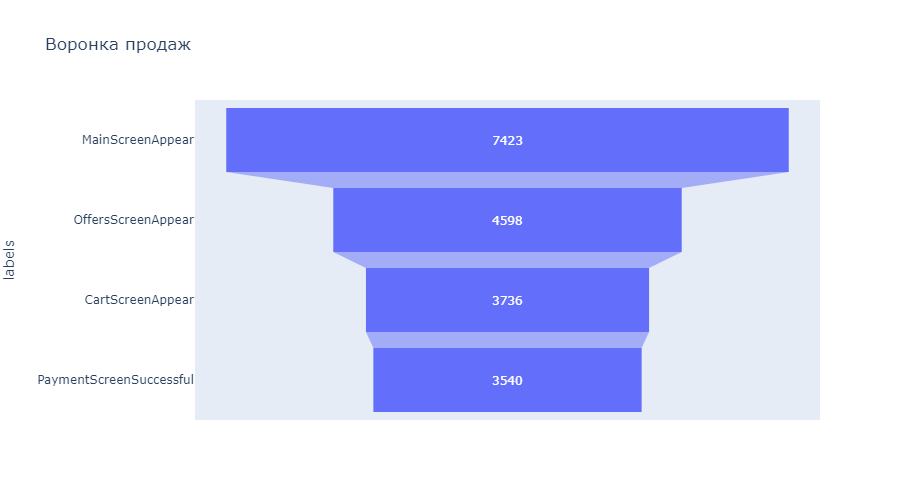

In [57]:
funnel_df = dict(values=funnel['user_id'],
            labels=funnel['event_name'])
fig = px.funnel(funnel_df,  y='labels', x='values', title='Воронка продаж')
fig.show(renderer = 'png', width = 900, height = 500,scale = None)

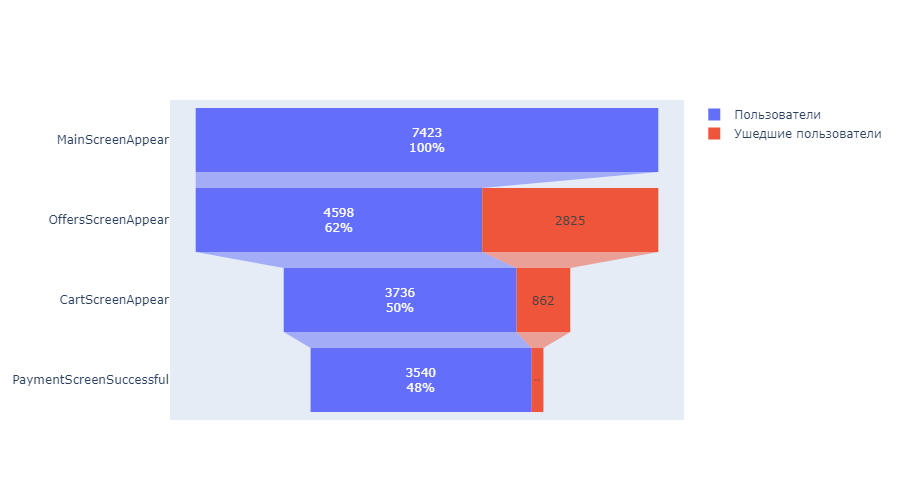

In [58]:
fig = go.Figure()

fig.add_trace(go.Funnel( name = 'Пользователи', y = funnel['event_name'],\
                        x = funnel['user_id'], textinfo = "value+percent initial"))

fig.add_trace(go.Funnel( name = 'Ушедшие пользователи', orientation = "h", y = funnel['event_name'],\
                        x = funnel['lost'], textposition = "inside", textinfo = "value")) 

fig.show(renderer = 'png', width = 900, height = 500,scale = None)

Больше всего пользователей "уходят" после 1 шага

# Шаг 5. Изучите результаты эксперимента #

**5.1 Сколько пользователей в каждой экспериментальной группе?**

In [59]:
group_cnt = good_logs.groupby('exp_id').agg({'user_id' : 'nunique'})

In [60]:
group_cnt

,user_id
exp_id,
246,2484
247,2517
248,2537


In [61]:
group_cnt.sum(axis = 0)

user_id    7538
dtype: int64

In [62]:
good_logs['user_id'].nunique()

7538

Количество уникальных пользователей по всему датасету и сумма уникальных по группам сошлась, это значит, что нет пользователей, которые присутствуют в несольких группах.

In [63]:
group_cnt.loc['246+247'] = group_cnt.loc[246] + group_cnt.loc[247]

In [64]:
group_cnt

,user_id
exp_id,
246,2484
247,2517
248,2537
246+247,5001


В группе 246 - 2484 <br>
В группе 247 - 2517<br>
В группе 248 - 2537<br>
В группе 246+247 - 5001

**5.2-5.3 Проведем А/A тест и проверим, есть ли статистически значимая разницу между контрольными группами 246 и 247.**

Проверим различие в количестве пользоватей в 2 контрольных группах

In [65]:
(1-group_cnt['user_id']/group_cnt['user_id'].shift(1))*100

exp_id
246              NaN
247        -1.328502
248        -0.794597
246+247   -97.122586
Name: user_id, dtype: float64

Группы 246 и 247 отличаются на 1.33%. В идеале, разница в количестве пользователей не должна быть более  1%. Но, работаем с теми данными, что имеем

**Нулевая гипотеза**: доли уникальных посетителей, побывавших на этапе воронки, одинаковы.<br>
**Альтенативная гипотеза**: между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разниц<br>
**Уровень статистической значимости**: 0.01 <br>
**Выбранный способ**: z-тест
<br>

In [66]:
z_pv = good_logs.pivot_table(index = 'event_name', columns = 'exp_id', values = 'user_id', aggfunc = 'nunique')

In [67]:
z_pv = z_pv.query('event_name != "Tutorial"')

In [68]:
z_pv.reset_index()

exp_id,event_name,246,247,248
0,CartScreenAppear,1266,1239,1231
1,MainScreenAppear,2450,2479,2494
2,OffersScreenAppear,1542,1524,1532
3,PaymentScreenSuccessful,1200,1158,1182


In [69]:
z_pv['246+247'] = z_pv[246] + z_pv[247]

In [70]:
z_pv['246+247'] = z_pv['246+247'].astype(int)

In [71]:
z_pv

exp_id,246,247,248,246+247
event_name,,,,
CartScreenAppear,1266,1239,1231,2505
MainScreenAppear,2450,2479,2494,4929
OffersScreenAppear,1542,1524,1532,3066
PaymentScreenSuccessful,1200,1158,1182,2358


In [72]:
z_pv = z_pv.sort_values(by =246,ascending = False)

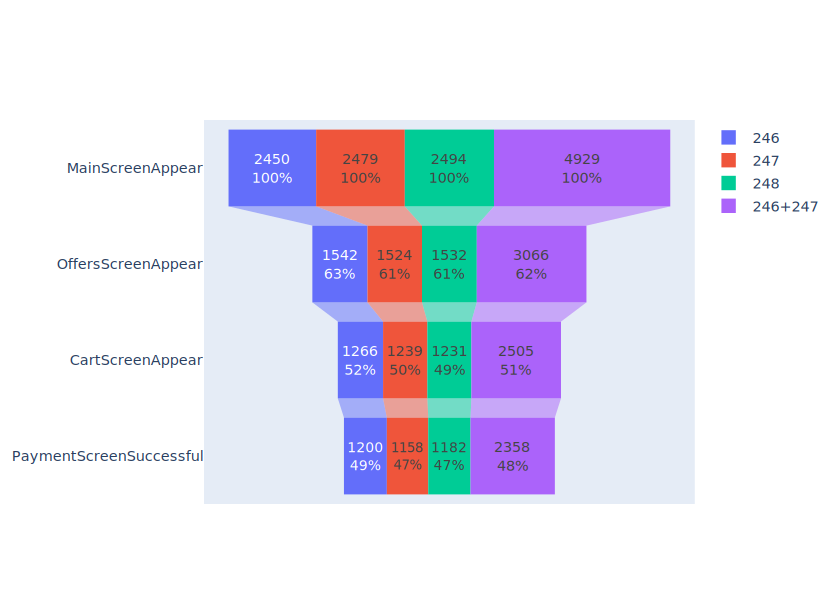

In [73]:
fig = go.Figure()

fig.add_trace(go.Funnel( name = '246', y = z_pv.index,\
                        x = z_pv[246], textinfo = "value+percent initial"))

fig.add_trace(go.Funnel( name = '247', orientation = "h", y = z_pv.index,\
                        x = z_pv[247], textposition = "inside", textinfo = "value+percent initial")) 

fig.add_trace(go.Funnel( name = '248', orientation = "h", y = z_pv.index,\
                        x = z_pv[248], textposition = "inside", textinfo = "value+percent initial")) 

fig.add_trace(go.Funnel( name = '246+247', orientation = "h", y = z_pv.index,\
                        x = z_pv['246+247'], textposition = "inside", textinfo = "value+percent initial")) 

fig.show()

**Создадим функцию для z-теста**

In [74]:
def z_test (group1, group2, alpha):
    for i in z_pv.index:
        p1_group1 = z_pv[group1][i]/group_cnt.loc[group1]

        # пропорция успехов во второй группе:
        p2_group2 = z_pv[group2][i]/group_cnt.loc[group2]

        # пропорция успехов в комбинированном датасете:
        p_combined = (z_pv[group1][i] + z_pv[group2][i]) / (group_cnt.loc[group1] + group_cnt.loc[group2])

        # разница пропорций в датасетах
        difference = p1_group1 - p2_group2 

        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/group_cnt.loc[group1] + 1/group_cnt.loc[group2]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = stats.norm(0, 1)  

        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('p-value: ', p_value)

        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть статистически значимая разница')
        else:
            print(
                'Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы '
            ) 


In [75]:
z_test(246, 247, 0.01)

p-value:  [0.67562177]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.26698769]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.21828121]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.10298395]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 


Мы провели А/А тест для каждого этапа воронки. После проведения теста, мы не нашли статисчисески значимых различий ни на одном из шагов воронки. Это значит, что А/А тест прошел успешно

**Отлично, можно проводить А/Б тест.**

**Сравниваем контрольную группу 246 и группу с измененным шрифтом 248**

**Нулевая гипотеза**: доли уникальных посетителей, побывавших на этапе воронки, одинаковы.<br>
**Альтенативная гипотеза**: между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разниц<br>
**Уровень статистической значимости**: 0.05 <br>
**Выбранный способ**: z-тест
<br>

In [76]:
z_test(246, 248, 0.05)

p-value:  [0.34705881]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.21886922]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.08328413]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.22269359]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 


**Сравниваем контрольную группу 247 и группу с измененным шрифтом 248**

**Нулевая гипотеза**: доли уникальных посетителей, побывавших на этапе воронки, одинаковы.<br>
**Альтенативная гипотеза**: между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разниц<br>
**Уровень статистической значимости**: 0.05 <br>
**Выбранный способ**: z-тест
<br>

In [77]:
z_test(247, 248, 0.05)

p-value:  [0.60016616]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.90625093]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.61695175]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.67754136]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 


**Сравниваем объединенную контрольную группу и группу с измененным шрифтом 248**

**Нулевая гипотеза**: доли уникальных посетителей, побывавших на этапе воронки, одинаковы.<br>
**Альтенативная гипотеза**: между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разниц<br>
**Уровень статистической значимости**: 0.05 <br>
**Выбранный способ**: z-тест
<br>

In [78]:
z_test(248, '246+247', 0.05)

p-value:  [0.39298915]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.43830674]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.19819341]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 
p-value:  [0.64520577]
Не получилось отвергнуть нулевую гипотезу, между долями нет статистически значимой разницы 


**5.5 Выводы по количеству проверок и уровне статистической значимости**

Уровень статистической значимости 0.01 для АА, и 0.05 для АБ теста. 

Всего проверок - 16 проверок. 4 для АА, по 4 теста для каждой контрольной и эксперементальной группы и 4 между объединенной контрольной и экмпериментальной. 

Поправки к множественным сравнениям не смогут изменить результатов теста, т.к все поправки уменьшают значение альфа. Это значит, что опровергнуть нулевую теорию будет еще сложнее, т.к p-value в наших тестах намного больше, чем уровень статистической значимости

Например, если использовать поправку Бонферрони, то альфа будет равна:

In [79]:
print(0.05/16,' - альфа с Поправкой Бонферрони, при альфа = 0.05')
print(0.01/16, ' - альфа с Поправкой Бонферрони, при альфа = 0.01')

0.003125  - альфа с Поправкой Бонферрони, при альфа = 0.05
0.000625  - альфа с Поправкой Бонферрони, при альфа = 0.01


А минимальное значение p-value во всех 16 тестах - 0.08

Какой уровень значимости стоит применить?<br>
Обычная практика - устанавливать уровень значимости 0.01 или 0.05. В нашем случае изменение уровня значимости в АБ тесте с 0.05 на 0.01 не изменила бы результата. А вот значение 0.1 - это уже слишком много, потому что каждый 10 эксперимент выдаст ложный резлуьтат.

**Нет статистически значимой разницы между всеми группами**

Это значит, что тест можно останавливать, его результат - неуспешный. Шрифт никак не повлиял на пользователей.

# 6. Вывод

Переименовали столбцы. Удалили явные дубликаты. Добавили стобцы с датой и датой и временем. Пропусков в данных не обнаружено. Размер датасета 243713 строк × 6 столбцов

Максимальная дата: 2019-08-07 21:15:17<br>
Минимальная дата: 2019-07-25 04:43:36

Относительные значения после среза и очистки данных:<br>
Потеря данных - 0.82%<br>
Потеря пользователей - 0.17%<br>
Абсолютные значения среза и очистки данных:<br>
Потеря данных - 1933<br>
Потеря пользователей - 13<br>

Tutorial убираем из воронки, потому что он необязательный, и большинство пользователей пропускают этот пункт.

Самый большой отток пользователей после 1 шага воронки (главный экран) в количестве 2825 

47.6% процентов доходят до оплаты

Уровень статистической значимости 0.01 для АА, и 0.05 для АБ теста.

Всего проверок - 16 проверок. 4 для АА, по 4 теста для каждой контрольной и эксперементальной группы и 4 между объединенной контрольной и экмпериментальной.

Поправки к множественным сравнениям не смогут изменить результатов теста, т.к все поправки уменьшают значение альфа. Это значит, что опровергнуть нулевую теорию будет еще сложнее, т.к p-value в наших тестах намного больше, чем уровень статистической значимости

Обычная практика - устанавливать уровень значимости 0.01 или 0.05. В нашем случае изменение уровня значимости в АБ тесте с 0.05 на 0.01 не изменила бы результата. А вот значение 0.1 - это уже слишком много, потому что каждый 10 эксперимент выдаст ложный резлуьтат.

Нет статистически значимой разницы между всеми группами

Это значит, что тест можно останавливать, его результат - неуспешный. Шрифт никак не повлиял на пользователей.